### 2. Generate background subtructed $\gamma-\gamma$ matrix using Radware approch

In [1]:
//%jsroot on
TCanvas *c1=new TCanvas;

### Input 

In [2]:
TString rootfile="hggl.root";//input root file - user
TString h2name="hggl";//gg-matrix - user

In [3]:
TFile *fin=new TFile(rootfile.Data());
TH2F *hg2xy=(TH2F*)fin->Get(h2name.Data()); //original gamma-gamma matrix
int nbin=hg2xy->GetNbinsX();
float xmin=hg2xy->GetXaxis()->GetBinLowEdge(1);
float xmax=hg2xy->GetXaxis()->GetBinLowEdge(nbin+1);
//1d total projection
TH1F *hg2x=(TH1F*)hg2xy->ProjectionX("hg2x",1,nbin);//total projection spectrum
cout<<nbin<<","<<xmin<<","<<xmax<<endl;

4000,0,4000


In [4]:
//matrix
TH2F *hg2xyb=new TH2F("hg2xyb","bg matrix",nbin,xmin,xmax,nbin,xmin,xmax);//background matrix
TH2F *hg2xyp=new TH2F("hg2xyp","bg subtracted matrix",nbin,xmin,xmax,nbin,xmin,xmax);//background subtracted matrix

### Background spectrum
- Change the second and third parameters of Background function to get the desired shape of the background spectrum.

In [5]:
TSpectrum *sa=new TSpectrum(200);
TH1F *hg2xb=(TH1F*)sa->Background(hg2x,20,"nosmoothing");//background spectrum, user
TH1F *hg2xp=new TH1F("hg2xp","",nbin,xmin,xmax);//peak spectrum

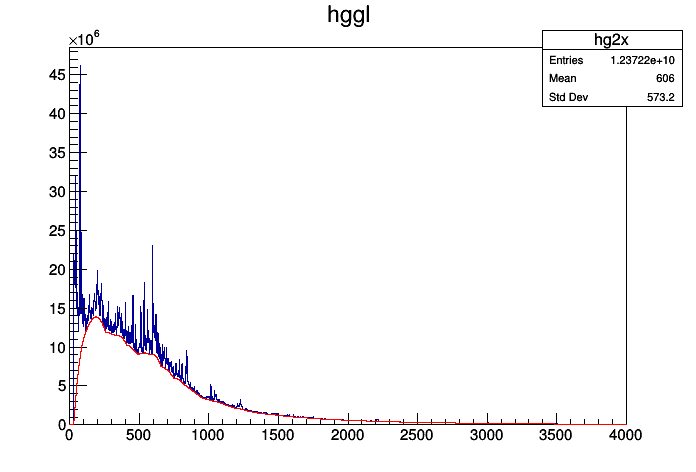

In [6]:
hg2x->Draw();
hg2xb->Draw("same");
c1->Draw();

In [7]:
hg2xp->Add(hg2x,hg2xb,1,-1);  

### Background subtructed gg matrix --Radware approch 

In [8]:
   //make background matrix - RADWARE approch
   Double_t T,Pi,Pj,pi,pj,Bij;
   T=hg2x->Integral();
   int N=hg2x->GetNbinsX();
   for(int i=1; i<=N; i++) {
     for(int j=1; j<=N; j++) {
       Pi=hg2x->GetBinContent(i);
       Pj=hg2x->GetBinContent(j);
       pi=hg2xp->GetBinContent(i);
       pj=hg2xp->GetBinContent(j);
       Bij=(Pi*Pj-pi*pj)/T;
       Double_t x=hg2x->GetBinCenter(i);
       Double_t y=hg2x->GetBinCenter(j);       
       hg2xyb->Fill(x,y,Bij);
     }
   }
   hg2xyp->Sumw2(0);
   hg2xyp->Add(hg2xy,hg2xyb,1,-1);

### output

In [9]:
//output file
TFile *fout=new TFile("hgglmatrix.root","RECREATE");//user
hg2xyp->Write();
fout->Close();